In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import matplotlib as mpl
mpl.style.use('seaborn-notebook')

In [2]:
tonedata = pd.read_csv("data/cancer.csv", sep=",")
tonedata

,cancer,population
0,1,445
1,0,559
2,3,677
3,4,681
4,3,746
...,...,...
296,250,62931
297,267,63476
298,244,66676
299,248,74005


In [3]:
X_population = np.log(1+tonedata["population"].values.astype('d'))
X_cancer = np.log(1+tonedata["cancer"].values.astype('d'))

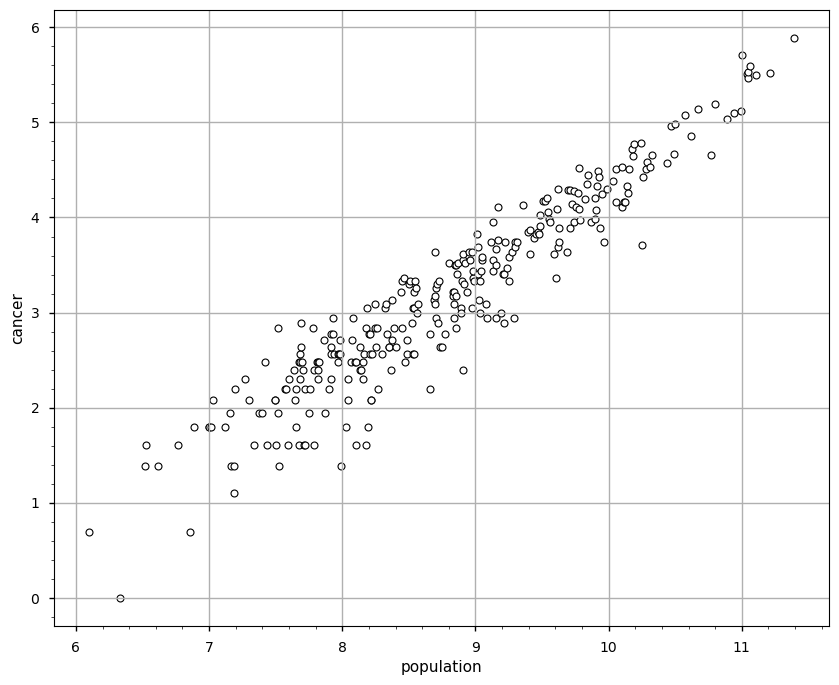

In [4]:
# plt.figure(figsize=(7,5))
plt.figure(figsize=(10,8))
plt.scatter(X_population, X_cancer, s=25, c='w', edgecolors='k', linewidth=0.8)
plt.xlabel('population')
plt.ylabel('cancer')
plt.minorticks_on()
plt.grid(1)
# plt.ylim(1.2, 3.1)
# plt.xlim(1.2, 3.1)
# plt.legend()
# plt.savefig('fig/tonedata_scatter.eps')
plt.show()

In [5]:
import mlgrad
import mlgrad.model as ml_model
import mlgrad.risk as ml_risk
import mlgrad.loss as ml_loss
import mlgrad.func as ml_func
import mlgrad.weights as ml_weights
import mlgrad.af as ml_af

In [6]:
layer = ml_model.GeneralModelLayer(1)
tone_linmod1 = ml_model.LinearModel(1)
tone_linmod2 = ml_model.LinearModel(1)
layer.append(tone_linmod1)
layer.append(tone_linmod2)
nn = ml_model.FFNetworkModel()
nn.add(layer)
# for mod in layer.models:
#     print(mod.n_param)
# print(layer.n_param)
# print(nn.n_param)

nn.allocate()
# print(np.array(nn.param))
# for mod in layer:
#     print(np.array(mod.param))

# print('*')
nn.init_param()

# print(np.array(nn.param))
# for mod in layer:
#     print(np.array(mod.param))


In [7]:
layer = nn.layers[0]
layer.param.base

array([0.60582351, 0.77001099, 0.73199542, 0.70215699])

In [8]:
minloss = ml_loss.SoftMinLoss(ml_loss.ErrorLoss(ml_func.SoftAbs()), 2, a=15)
tone_risk = ml_risk.ERisk2(X_population.reshape(-1,1), X_cancer, nn, minloss)

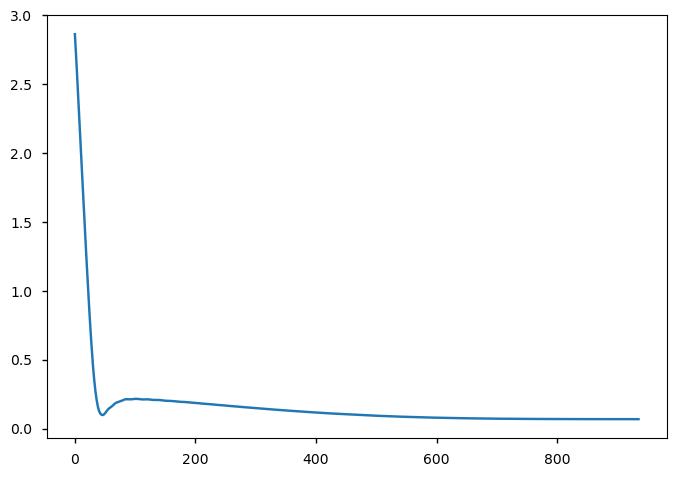

In [9]:
tone_alg = mlgrad.erm_fg(tone_risk, n_restart=5, h=0.01)

plt.plot(tone_alg.lvals)
plt.show()

In [10]:
print(np.array(tone_linmod1.param))
print(np.array(tone_linmod2.param))
tone_alg.K

[-4.80737033  0.91213085]
[-0.39228709 -0.42254075]


935

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


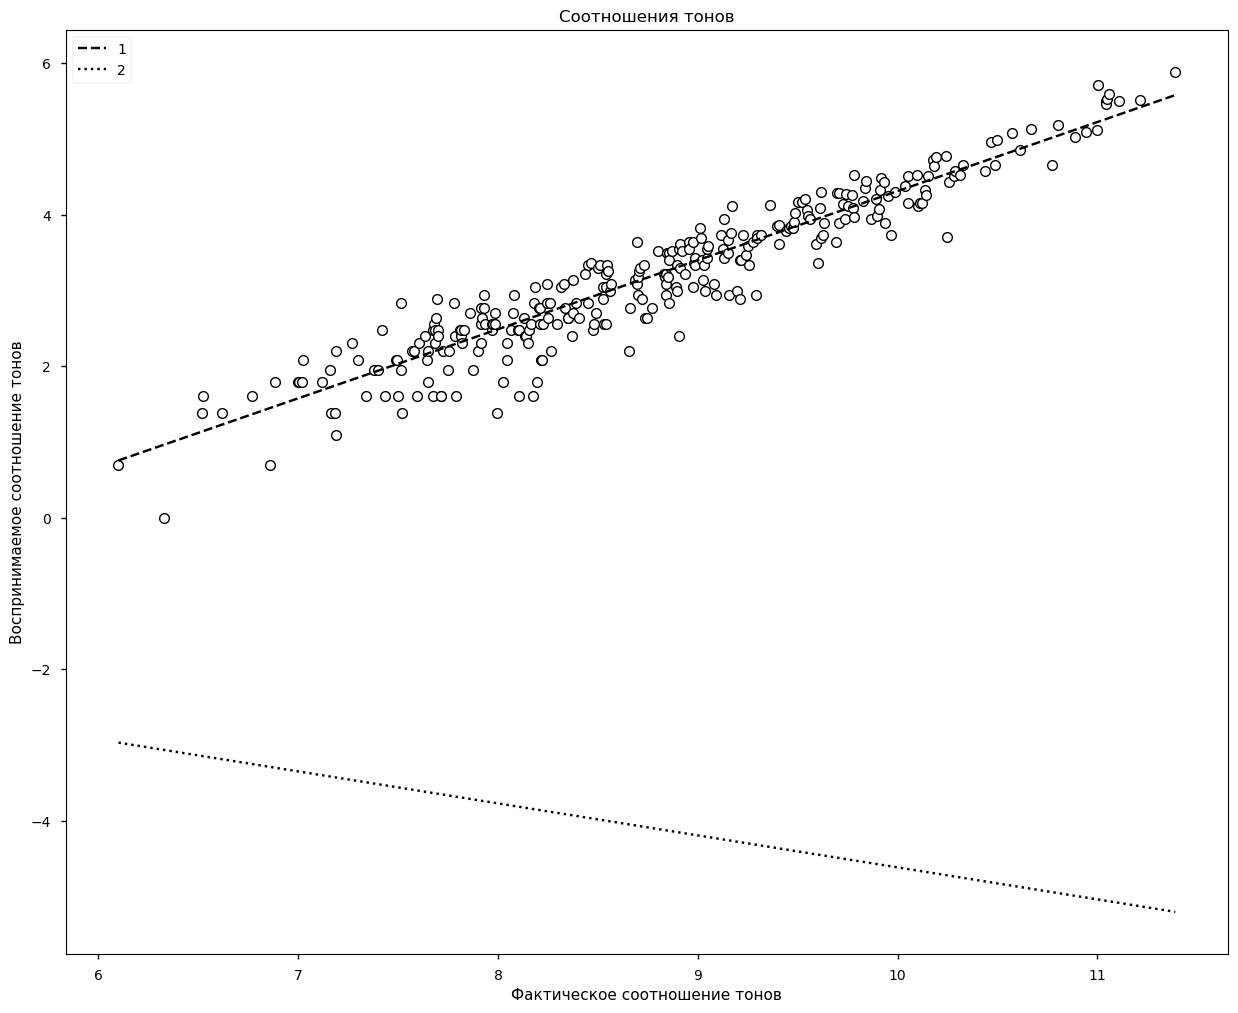

In [11]:
# plt.figure(figsize=(7,5))
plt.figure(figsize=(15,12))
plt.scatter(X_population, X_cancer, s=49, c='w', edgecolors='k', linewidth=1.0)
plt.title("Соотношения тонов")
xrange = np.array([X_population.min(), X_population.max()])
plt.plot(xrange, tone_linmod1.evaluate_all(xrange.reshape(-1,1)), linestyle='--', label='1', color='k')
plt.plot(xrange, tone_linmod2.evaluate_all(xrange.reshape(-1,1)), linestyle=':', label='2', color='k')
# for x_name, x_income, x_prestige in zip(X_name, X_income, X_prestige):
#     plt.text(x_income, x_prestige+2, x_name)
plt.xlabel('Фактическое соотношение тонов')
plt.ylabel('Воспринимаемое соотношение тонов')
# plt.ylim(1.2, 3.1)
# plt.xlim(1.2, 3.1)
plt.legend()
plt.savefig('fig/tonedata_scatter.eps')
plt.show()

In [12]:
layer_rob = ml_model.GeneralModelLayer(1)
tone_rob_linmod1 = ml_model.LinearModel(1)
tone_rob_linmod2 = ml_model.LinearModel(1)
layer_rob.append(tone_rob_linmod1)
layer_rob.append(tone_rob_linmod2)
nn_rob = ml_model.FFNetworkModel()
nn_rob.add(layer_rob)

nn_rob.allocate()
nn_rob.init_param()

In [13]:
minloss = ml_loss.SoftMinLoss(ml_loss.ErrorLoss(ml_func.SoftAbs()), 2, a=15)
tone_risk = ml_risk.ERisk2(X_population.reshape(-1,1), X_cancer, nn_rob, minloss)
agg_func = ml_af.averaging_function("WM", alpha=0.98)
weights_tone = ml_weights.MWeights(agg_func, tone_risk)

0.03384419812103901


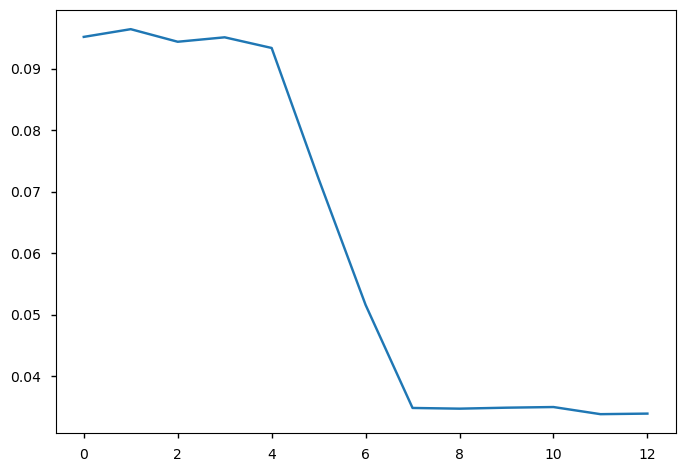

In [14]:
fg_tone = mlgrad.fg(tone_risk, h=0.001)
tone_rob_alg = mlgrad.erm_irgd(fg_tone, weights_tone)

plt.plot(tone_rob_alg.lvals)
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


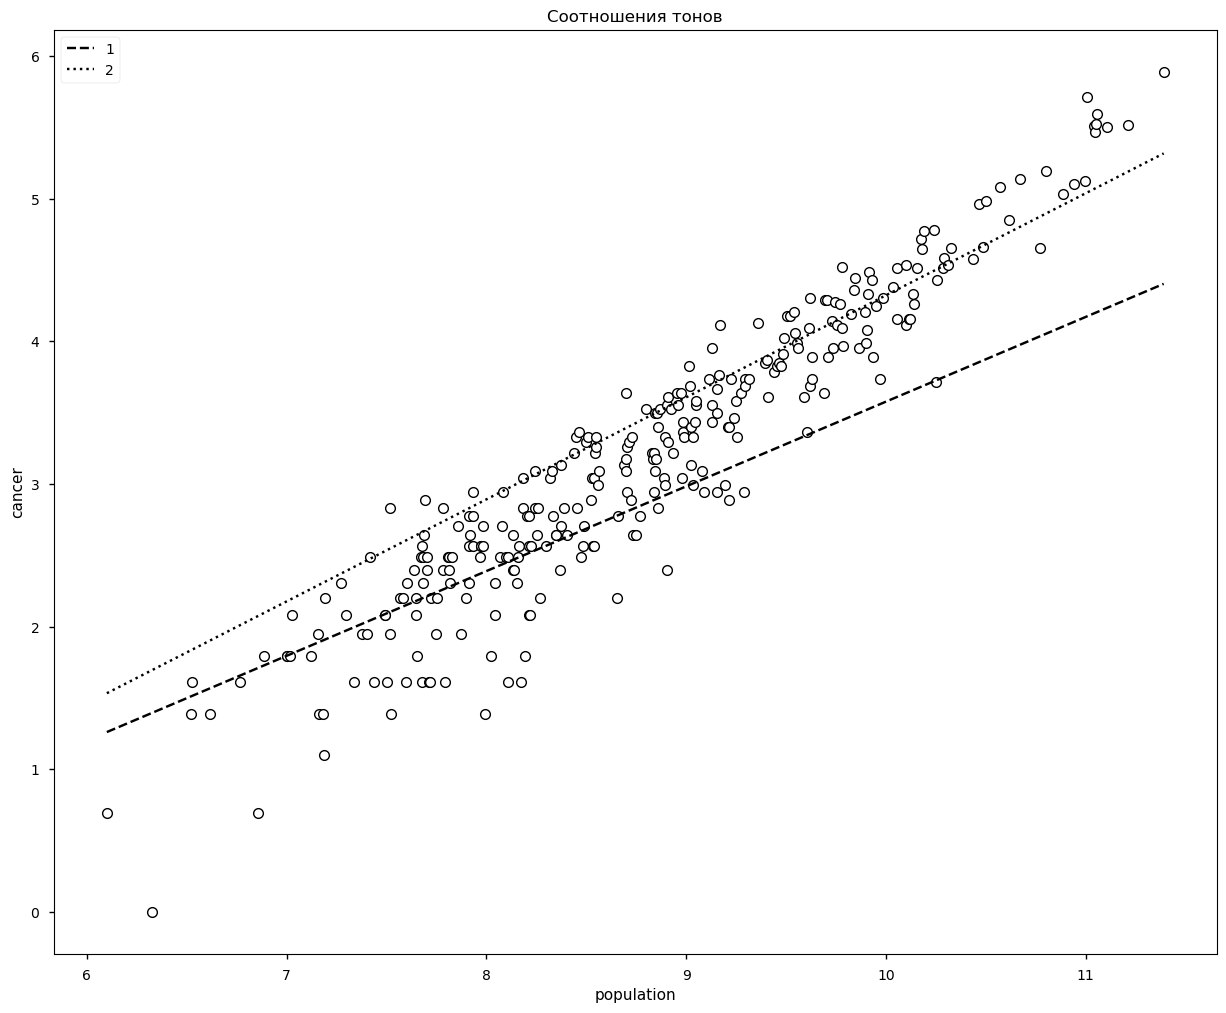

In [15]:
# plt.figure(figsize=(7,5))
plt.figure(figsize=(15,12))
plt.scatter(X_population, X_cancer, s=49, c='w', edgecolors='k', linewidth=1.0)
plt.title("Соотношения тонов")
plt.plot(xrange, tone_rob_linmod1.evaluate_all(xrange.reshape(-1,1)), linestyle='--', label='1', color='k')
plt.plot(xrange, tone_rob_linmod2.evaluate_all(xrange.reshape(-1,1)), linestyle=':', label='2', color='k')
# for x_name, x_income, x_prestige in zip(X_name, X_income, X_prestige):
#     plt.text(x_income, x_prestige+2, x_name)
plt.xlabel('population')
plt.ylabel('cancer')
# plt.ylim(1.2, 3.1)
# plt.xlim(1.2, 3.1)
plt.legend()
plt.savefig('fig/tonedata_rob_scatter.eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


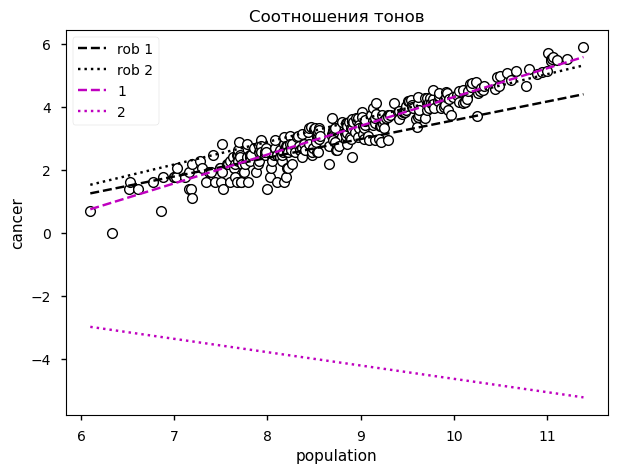

In [16]:
plt.figure(figsize=(7,5))
# plt.figure(figsize=(15,12))
plt.scatter(X_population, X_cancer, s=49, c='w', edgecolors='k', linewidth=1.0)
plt.title("Соотношения тонов")
plt.plot(xrange, tone_rob_linmod1.evaluate_all(xrange.reshape(-1,1)), linestyle='--', label='rob 1', color='k')
plt.plot(xrange, tone_rob_linmod2.evaluate_all(xrange.reshape(-1,1)), linestyle=':', label='rob 2', color='k')
plt.plot(xrange, tone_linmod1.evaluate_all(xrange.reshape(-1,1)), linestyle='--', label='1', color='m')
plt.plot(xrange, tone_linmod2.evaluate_all(xrange.reshape(-1,1)), linestyle=':', label='2', color='m')
# for x_name, x_income, x_prestige in zip(X_name, X_income, X_prestige):
#     plt.text(x_income, x_prestige+2, x_name)
plt.xlabel('population')
plt.ylabel('cancer')
# plt.ylim(1.2, 3.1)
# plt.xlim(1.2, 3.1)
plt.legend()
plt.savefig('fig/tonedata_rob_scatter.eps')
plt.show()